# Modelos y Representaciones de Datos

El objetivo de este notebook es entender, usando un dataset de clasificación sencillo, cómo funcionan distintos modelos de Machine Learning destacando sus ventajas y desventajas. 

También permite entender, para estos distintos modelos, cómo afecta la definición de sus hiperparámetros a las predicciones luego del entrenamiento.

Finalmente se muestra cómo crear una red neuronal pequeña con Keras y entrenarla para resolver este problema, visualizando su aprendizaje durante el entrenamiento y la representación de los datos en su capa "oculta".

> Las siguientes celdas de código deben correrse únicamente si se está trabajando desde Google Colab. Permiten clonar el repositorio desde Github a la sesión.

In [ ]:
!git clone https://github.com/JuanCruzC97/ml-stuff.git

In [ ]:
cd ml-stuff/representations

In [1]:
# Librerías para el manejo de los datos.
import pandas as pd
import numpy as np

# Librerías para visualización.
import plotly.express as px
import matplotlib.pyplot as plt

# Funciones propias.
from utils.datasets import make_classification_dataset

# Dataset

In [2]:
# Creamos un set de entrenamiento y evaluación.
train = make_classification_dataset(n_samples=500, noise=0.1, factor_0=0.6, factor_1=0.2, random_state=42)
test = make_classification_dataset(n_samples=200, noise=0.1, factor_0=0.6, factor_1=0.2, random_state=65)

In [3]:
train.head()

,X1,X2,y
0,0.386830,-0.198250,0
1,-0.027022,-0.625329,0
2,-0.318552,-0.131078,1
3,0.072915,0.652693,0
4,-0.238731,0.553774,0


In [4]:
# Visualizamos los datos de entrenamiento y evalaución.
px.scatter(data_frame=train,                                        # Pasamo el datset
           x="X1",                                                  # Variable en eje X
           y="X2",                                                  # Variable en eje Y
           color="y",                                               # Usamos el color para representar a la variable respuesta
           symbol="y",                                              # Usamos el símbolo de los puntos para representar la variable respuesta
           color_discrete_map={0:"#3d5a80", 1:"#ff6700"},           # Definimos los colores de las clases
           symbol_map={0:"circle", 1:"x"},                          # Definimos los símbolos de las clases
           title="Train Data",                                      # Título del gráfico
           height=600,                                              # Alto del gráfico
           width=600,                                               # Ancho del gráfico
           template="plotly_white").show()                          # Estilo del gráfico

# Visualizamos los datos de entrenamiento y evalaución.
px.scatter(data_frame=test,                                         # Pasamo el datset
           x="X1",                                                  # Variable en eje X
           y="X2",                                                  # Variable en eje Y
           color="y",                                               # Usamos el color para representar a la variable respuesta
           symbol="y",                                              # Usamos el símbolo de los puntos para representar la variable respuesta
           color_discrete_map={0:"#3d5a80", 1:"#ff6700"},           # Definimos los colores de las clases
           symbol_map={0:"circle", 1:"x"},                          # Definimos los símbolos de las clases
           title="Test Data",                                       # Título del gráfico
           height=600,                                              # Alto del gráfico
           width=600,                                               # Ancho del gráfico
           template="plotly_white").show()                          # Estilo del gráfico

# Models

Ahora tomaremos los datos de entrenamiento generados y vamos a entrenar distintos modelos para poder predecir la variable respuesta. Podemos usar los datos de evaluación (no vistos por el modelo en el entrenamiento) para entender cómo funciona el modelo en datos que no vio previamente.

* **Parámetros del Modelo**: Características del modelo que se aprenden al entrenar. Se obtienen los valores óptimos a partir de los datos durante el entrenamiento.
* **Hiperparámetros**: Características del modelo que no se aprenden en el entrenamiento y que definimos nosotros.
* **Métrica de Evaluación**: Método que usamos para comparar los valores de la respuesta reales y los predichos por el modelo.

Al ser un problema de clasificación balanceado podemos usar *accuracy* como métrica para evaluar el desempeño.

$$Accuracy=\frac{TP+TN}{TP+FP+TN+FN}$$

In [5]:
# Importamos funciones para el cálculo de métricas.
from sklearn.metrics import accuracy_score
from utils.metrics import display_confusion_matrix

## Logistic Regression

Este modelo es una regresión lineal con una transformación (sigmoid) que mapea los resultados a valores entre 0 y 1. Permite encontrar una separación lineal en un problema de clasificación binaria.

* Es un modelo simple e interpretable.
* Puede ayudar al modelo la normalización de las variables.
* Pocos hiperparámetros.
* Permite regularizar con los hiperparámetros `penalty` y `C`.

![Modelo Logistico](assets/logistic_regression.png)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://mlu-explain.github.io/logistic-regression/

In [6]:
# Importamos el modelo logístico.
from sklearn.linear_model import LogisticRegression

In [7]:
# Iniciamos y entrenamos el modelo logístico con los datos de entrenamiento.
logistic = LogisticRegression(penalty="none", random_state=45)
logistic.fit(X=train[["X1", "X2"]], y=train["y"])

LogisticRegression(penalty='none', random_state=45)

Cuando evaluamos el modelo logístico tanto sobre los datos de entrenamiento como en los datos de evaluación podemos ver que tiene una capacidad de predicción similar a tirar una moneda para predecir la clase.

Esto se debe a que el modelo Logistico genera una separación lineal a partir de las variables explicativas y en este caso los datos pertenecientes a cada clase no son linealmente separables.

In [8]:
# Guardamos en los sets de train y test sus predicciones para cada observación.
train["y_logistic"] = pd.Series(logistic.predict(train[["X1", "X2"]]), dtype="category")
test["y_logistic"] = pd.Series(logistic.predict(test[["X1", "X2"]]), dtype="category")

# Imprimimos las métricas para evaluar el ajuste del modelo.
print(f'Train Accuracy: {round(accuracy_score(y_true=train["y"], y_pred=train["y_logistic"]),2)}')
print(f'Test Accuracy: {round(accuracy_score(y_true=test["y"], y_pred=test["y_logistic"]),2)}')

Train Accuracy: 0.53
Test Accuracy: 0.49


In [9]:
# Vemos la matriz de confusión de las predicciones del modelo.
display_confusion_matrix(y_true=train["y"], y_pred=train["y_logistic"])

,0 Pred,1 Pred
0 True,130,120
1 True,116,134


In [10]:
# Graficamos los datos, donde el símbolo representa la clase real y el color la clase predicha.
px.scatter(data_frame=train,
           x="X1",
           y="X2",
           color="y_logistic",
           symbol="y",
           color_discrete_map={0:"#3d5a80", 1:"#ff6700"},           
           symbol_map={0:"circle", 1:"x"},                          
           height=600,
           width=600,
           template="plotly_white")

Usando estas variables explicativas el modelo de regresión logística no podrá lograr una performance superior a elegir una clase al azar porque las clases no son linealmente separables.

## KNN

Es un algortimo muy simple, donde para cada nueva observación, la predicción de la clase a la que corresponde será la clase mayoritaria entre sus `k` vecinos más cercanos.

* Requiere una normalización de los datos para su uso.
* Tiene pocos hiperparámetros, siendo el principal `k` (la cantidad de vecinos considerados para clasificar).
* Fácil de interpretar.
* No escala bien cuando tenemos muchas observaciones o muchas dimensiones.
* El valor del número de vecinos más cercanos le aumenta o reduce el nivel de complejidad a la frontera.

![Modelo Logistico](assets/knn.png)

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
# Probar con 1 o 25.
k = 7

knn = KNeighborsClassifier(k)
knn.fit(X=train[["X1", "X2"]], y=train["y"])

KNeighborsClassifier(n_neighbors=7)

In [35]:
train["y_knn"] = pd.Series(knn.predict(train[["X1", "X2"]]), dtype="category")
test["y_knn"] = pd.Series(knn.predict(test[["X1", "X2"]]), dtype="category")

print(f'Train Accuracy: {round(accuracy_score(y_true=train["y"], y_pred=train["y_knn"]),2)}')
print(f'Test Accuracy: {round(accuracy_score(y_true=test["y"], y_pred=test["y_knn"]),2)}')

Train Accuracy: 0.97
Test Accuracy: 0.97


In [36]:
display_confusion_matrix(y_true=train["y"], y_pred=train["y_knn"])
display_confusion_matrix(y_true=test["y"], y_pred=test["y_knn"])

,0 Pred,1 Pred
0 True,241,9
1 True,6,244


,0 Pred,1 Pred
0 True,98,2
1 True,4,96


In [37]:
px.scatter(data_frame=test,
           x="X1",
           y="X2",
           color="y_knn",
           symbol="y",
           color_discrete_map={0:"#3d5a80", 1:"#ff6700"},           
           symbol_map={0:"circle", 1:"x"},    
           height=600,
           width=600,
           template="plotly_white")

## Tree

El árbol de decisión es un algorimo que busca en los datos de entrenamiento particiones binarias que maximicen la "pureza" de los nodos finales. Básicamente se trata de ir partiendo los datos en grupos buscando que cada grupo tenga las clases de la variable respuesta lo más homogeneas posible.

* No afecta la normalización de las variables.
* Fáciles de interpretar.
* Gran capacidad de ajuste (tendencia a overfitting).
* Gran cantidad de hiperparámetros para complejizar o regularizar el modelo.
* Variables muy potentes con técnicas de Bagging y Boosting (Ensembles).

![Árbol de Decisión](assets/tree.png)

Decision Tree
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Random Forests (Bagging)
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

Gradient Boosting (Boosting)
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier

In [38]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [62]:
# Probar expandiendo o limitando el arbol.
# Probar desde depth 1 e ir subiendo.
max_depth=1
max_leaf_nodes=None

tree = DecisionTreeClassifier(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes, random_state=42)
tree.fit(X=train[["X1", "X2"]], y=train["y"])

DecisionTreeClassifier(max_depth=1, random_state=42)

In [63]:
train["y_tree"] = pd.Series(tree.predict(train[["X1", "X2"]]), dtype="category")
test["y_tree"] = pd.Series(tree.predict(test[["X1", "X2"]]), dtype="category")

print(f'Train Accuracy: {round(accuracy_score(y_true=train["y"], y_pred=train["y_tree"]),2)}')
print(f'Test Accuracy: {round(accuracy_score(y_true=test["y"], y_pred=test["y_tree"]),2)}')

Train Accuracy: 0.65
Test Accuracy: 0.66


In [64]:
display_confusion_matrix(y_true=train["y"], y_pred=train["y_tree"])

,0 Pred,1 Pred
0 True,74,176
1 True,0,250


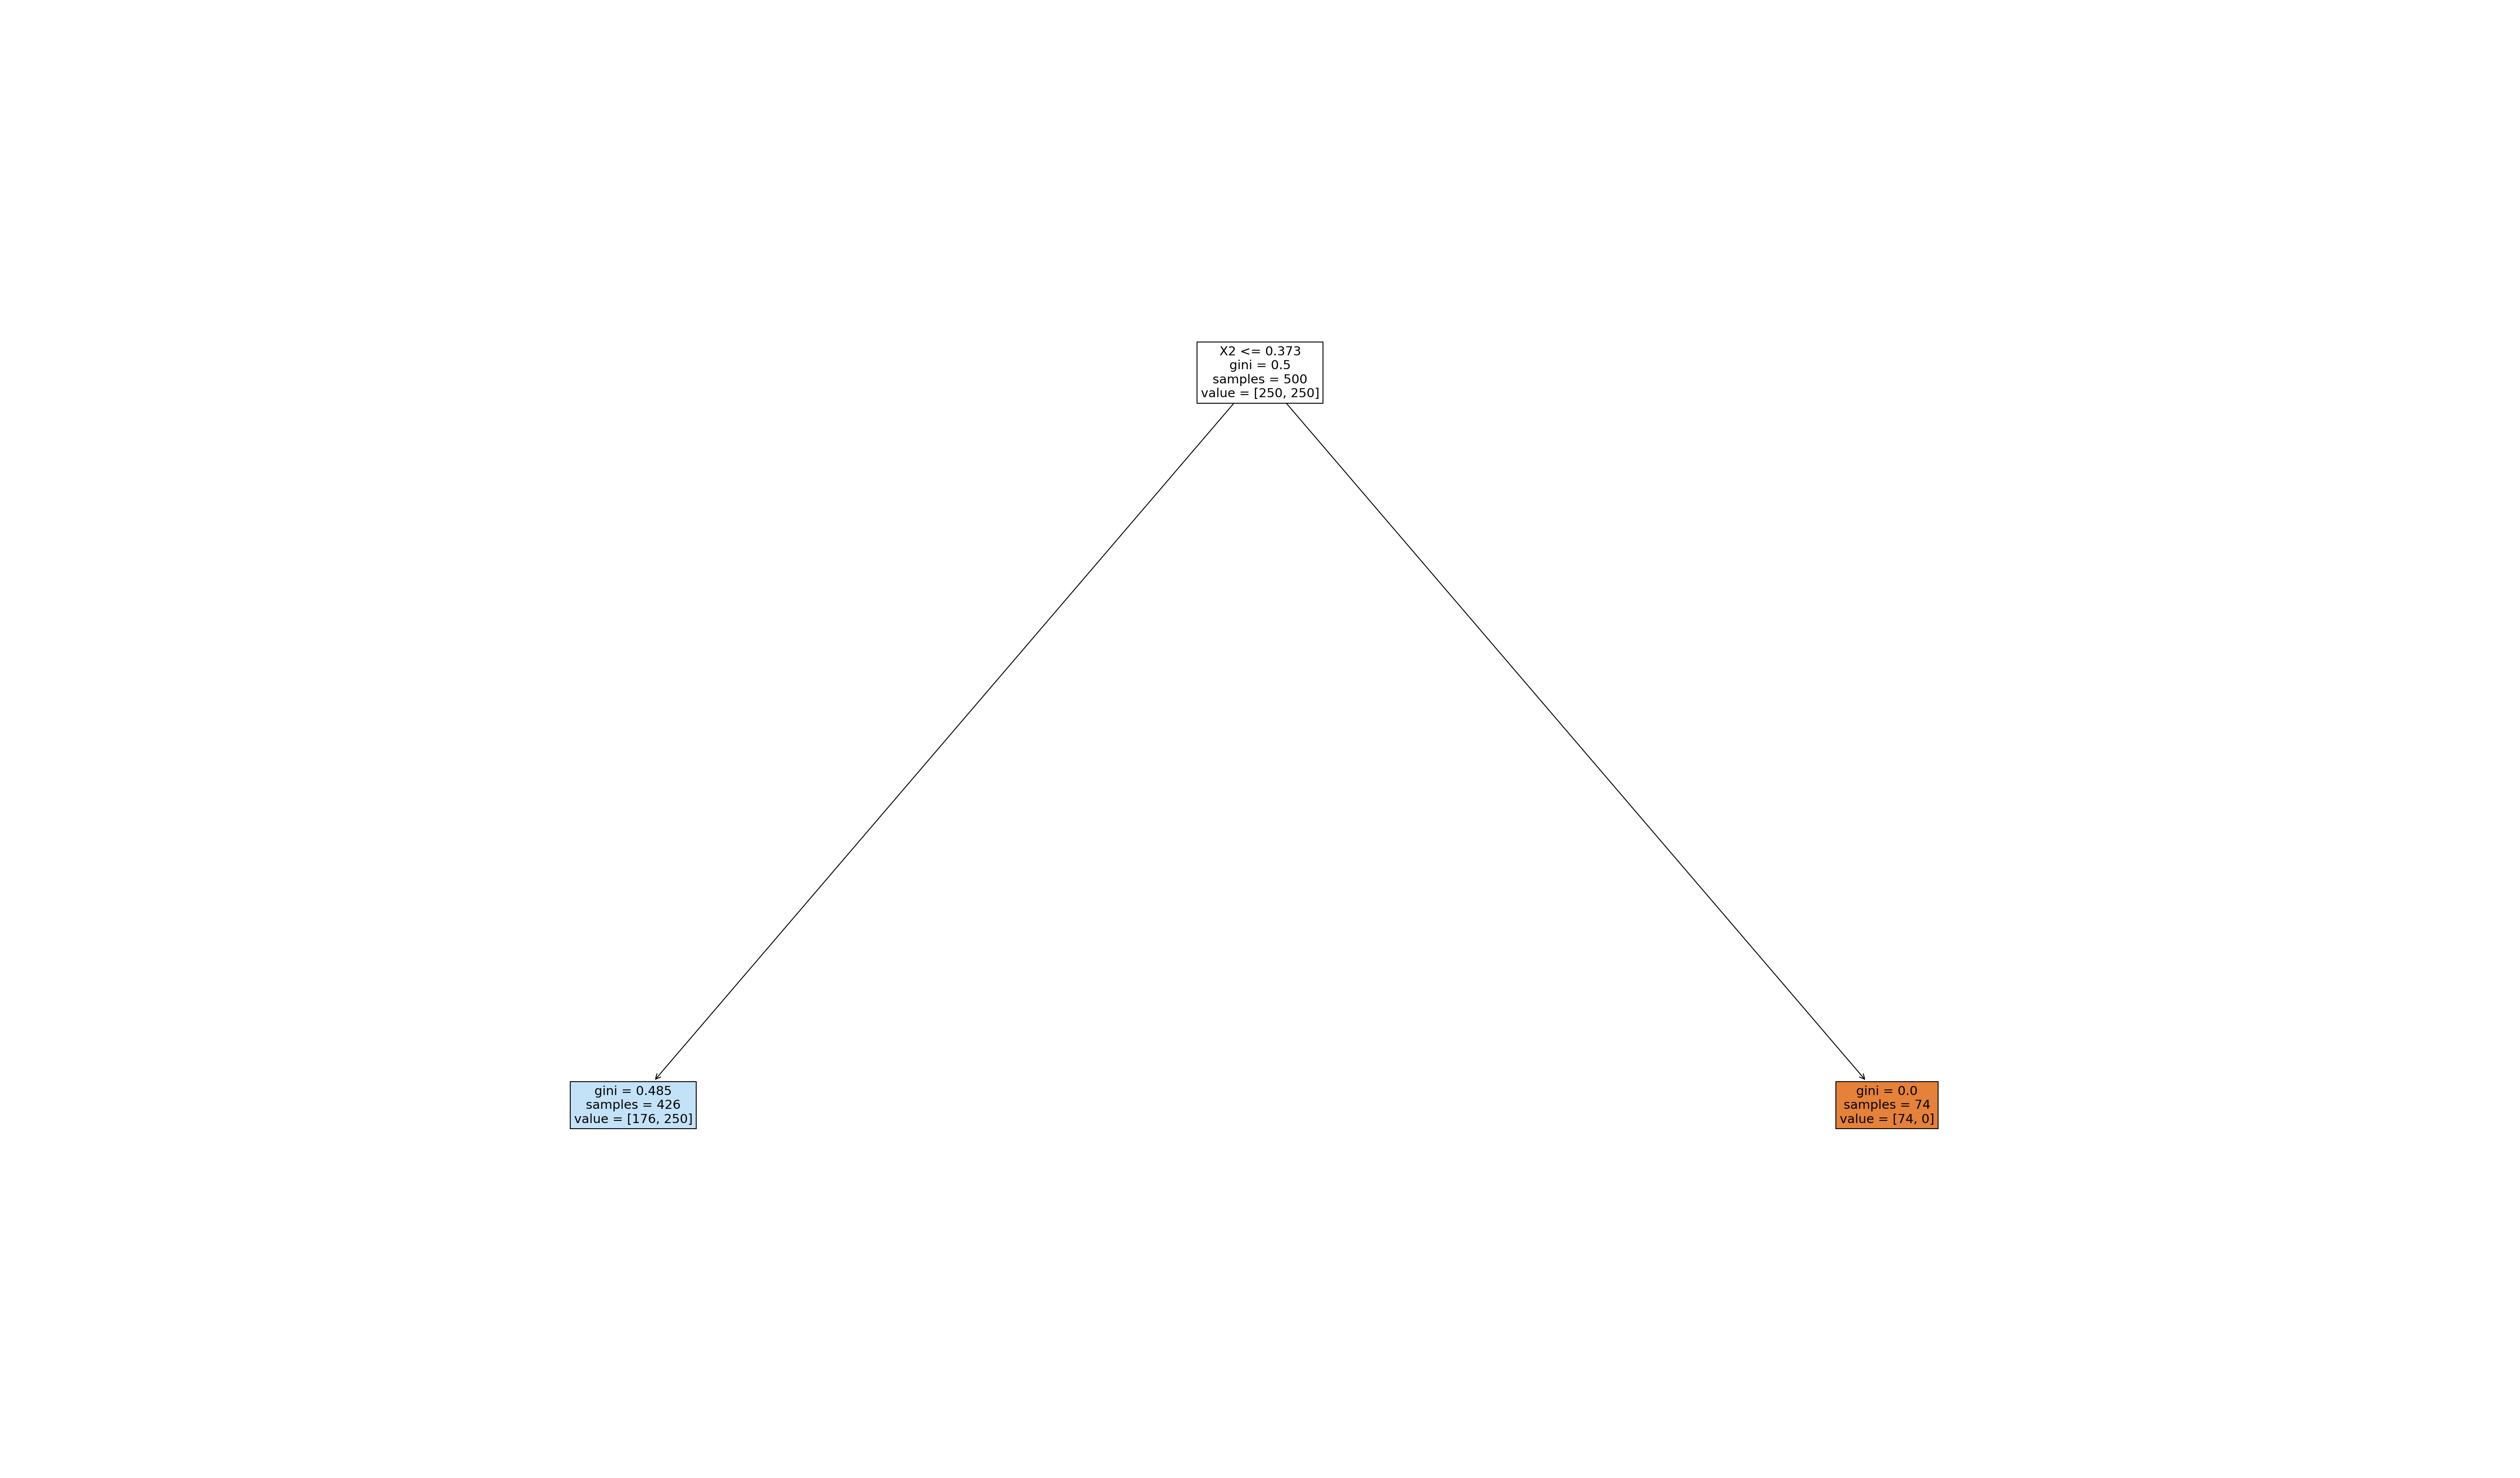

In [65]:
plt.figure(figsize=(50,30), dpi=150)
plot_tree(tree, feature_names=["X1", "X2"], filled=True, fontsize=14)
plt.show()

In [66]:
px.scatter(data_frame=train,
           x="X1",
           y="X2",
           color="y_tree",
           symbol="y",
           color_discrete_map={0:"#3d5a80", 1:"#ff6700"},           
           symbol_map={0:"circle", 1:"x"},    
           height=600,
           width=600,
           template="plotly_white")

## SVC

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [43]:
from sklearn.svm import SVC

In [44]:
c = 1
kernel = 'rbf'
degree = 2

svc = SVC(C=c, kernel=kernel, degree=degree, random_state=42)
svc.fit(X=train[["X1", "X2"]], y=train["y"])

SVC(C=1, degree=2, random_state=42)

In [45]:
train["y_svc"] = pd.Series(svc.predict(train[["X1", "X2"]]), dtype="category")
test["y_svc"] = pd.Series(svc.predict(test[["X1", "X2"]]), dtype="category")

print(f'Train Accuracy: {round(accuracy_score(y_true=train["y"], y_pred=train["y_svc"]),2)}')
print(f'Test Accuracy: {round(accuracy_score(y_true=test["y"], y_pred=test["y_svc"]),2)}')

Train Accuracy: 1.0
Test Accuracy: 1.0


In [46]:
display_confusion_matrix(y_true=train["y"], y_pred=train["y_svc"])

,0 Pred,1 Pred
0 True,250,0
1 True,0,250


In [47]:
px.scatter(data_frame=train,
           x="X1",
           y="X2",
           color="y_svc",
           symbol="y",
           color_discrete_map={0:"#3d5a80", 1:"#ff6700"},           
           symbol_map={0:"circle", 1:"x"},    
           height=600,
           width=600,
           template="plotly_white")

## Tensiones Sesgo-Varianza y Optimización-Generalización

* Sesgo: Es el error del modelo provocado por no ajustarse lo suficiente a la distribución real de los datos. Un modelo poco complejo no "seguirá" a la distribución real de los datos y tendrá alto sesgo, mientras que un modelo muy complejo se sobreajustará a los datos aprendiendo la aleatoriedad de los datos de entrenamiento.
* Varianza: Es el error que se introduce cuando la capacidad de predicción del modelo depende mucho de los datos con los que se entrenó. Un modelo muy complejo tendrá gran variabilidad en sus predicciones con un set de datos de entrenamiento levemente diferente, tiene alta varianza. Un modelo más simple no se verá muy afectado por un cambio en los datos de entrenamiento, por lo que tiene baja varianza.

Buscamos un modelo lo suficientemente complejo para seguir la forma funcional de los datos pero no lo excesivamente complejo para ajustarse al ruido de las observaciones de entrenamiento.

![Bias vs Var](assets/bias-var2.jpeg)

![Bias vs Var](assets/bias-var1.png)


## Neural Nets - Deep Learning

* En principio vamos a ver redes neuronales formadas por capas *densas*. Las redes neuronales densas son modelos que están compuestos por capas, donde cada capa tiene unidades o *neuronas* (por eso su nombre). 
* Todas las unidades o neuronas de una capa están conectadas con las siguientes. 
* En cada neurona se aplica una función usando los parámetros de la red que modifica los datos. 
* Los valores óptimos de los parámetros los aprendemos en el entrenamiento. 
* De esta manera cada capa de la red toma los datos de entrada, los transforma y los pasa a la siguiente capa.
* El modelo aprende a generar sucesivas representaciones nuevas de los datos que mejoran su capacidad de predecir la respuesta.

¿Qué transformación realiza sobre los datos? 

$$\phi(W.X+b) = \phi(w_{11}*x_1 + w_{12}*x_2+b)$$

Donde $\phi$ es una transformación **no lineal**.

Las redes neuronales son los modelos más flexibles, permiten trabajar con cualquier tipo de dato (con el preprocesamiento adecuado)

![NN](assets/nn.png)


In [94]:
import tensorflow as tf
from tensorflow import keras

In [124]:
# Definiciones del entrenamiento e hiperparámetros.
LOSS = "binary_crossentropy"
BATCH_SIZE = 20
EPOCHS = 45
LR = 0.1

# Paso 0: Iniciamos los parámetros aleatorios.
tf.random.set_seed(123)
initial_weights = keras.initializers.RandomNormal(0, 0.05, 123)

# Paso 1: Definimos la arquitectura de la red neuronal.
# Para este caso definimos dos capas, una capa de input y una capa de output.
inputs = keras.Input(shape=(2,), name="input")
hidden = keras.layers.Dense(3, activation="sigmoid", kernel_initializer=initial_weights, name="hidden")(inputs)
outputs = keras.layers.Dense(1, activation="sigmoid", kernel_initializer=initial_weights, name="output")(hidden)

# Paso 2: Construimos el modelo uniendo capas.
nn = keras.Model(inputs, outputs)

# Paso 3: Compilamos el modelo eligiendo la función a optimizar y el método de optimización.
nn.compile(optimizer=keras.optimizers.Adam(learning_rate=LR), loss=LOSS, metrics=["accuracy"])

# Paso 4: Entrenamos el modelo.
fit_history = nn.fit(x=train[["X1", "X2"]],
                     y=train["y"],
                     batch_size=BATCH_SIZE,
                     epochs=EPOCHS,
                     verbose=False,
                     shuffle=True)


In [125]:
nn.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 2)]               0         
                                                                 
 hidden (Dense)              (None, 3)                 9         
                                                                 
 output (Dense)              (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [126]:
px.line(data_frame=pd.DataFrame(fit_history.history),
        x=np.arange(0,EPOCHS),
        y="accuracy",
        color_discrete_sequence=["#3d5a80"],
        height=500,
        width=800,
        template="plotly_white").show()

px.line(data_frame=pd.DataFrame(fit_history.history),
        x=np.arange(0,EPOCHS),
        y="loss",
        color_discrete_sequence=["#3d5a80"],
        height=500,
        width=800,
        template="plotly_white").show()

In [127]:
train["y_nn"] = pd.Series(nn.predict(train[["X1", "X2"]], verbose=False).ravel().round().astype("int"), dtype="category")
test["y_nn"] = pd.Series(nn.predict(test[["X1", "X2"]], verbose=False).ravel().round().astype("int"), dtype="category")

print(f'Train Accuracy: {round(accuracy_score(y_true=train["y"], y_pred=train["y_nn"]),2)}')
print(f'Test Accuracy: {round(accuracy_score(y_true=test["y"], y_pred=test["y_nn"]),2)}')

Train Accuracy: 0.95
Test Accuracy: 0.95


In [128]:
display_confusion_matrix(y_true=train["y"], y_pred=train["y_nn"])
display_confusion_matrix(y_true=test["y"], y_pred=test["y_nn"])

,0 Pred,1 Pred
0 True,247,3
1 True,21,229


,0 Pred,1 Pred
0 True,99,1
1 True,9,91


In [129]:
px.scatter(data_frame=test,
           x="X1",
           y="X2",
           color="y_nn",
           symbol="y",
           color_discrete_map={0:"#3d5a80", 1:"#ff6700"},           
           symbol_map={0:"circle", 1:"x"},    
           height=600,
           width=600,
           template="plotly_white")

## Representaciones Ocultas

Las redes neuronales son una sucesión de transformaciones de los datos, realizadas usando los parámetros de la red, y que maximizan su capacidad de pronosticar la variable respuesta. Todos los parámetros de la red se optimizan en conjunto para "encontrar" o generar estas nuevas transformaciones.

Como nuestra nueva representación (generada por la capa oculta) tiene 3 dimensiones, podemos visualizar cómo la red neuronal transformó los datos para su clasificación posterior (por la capa de salida).

En este dataset muy simple no se justifica usar este modelo, pero la gran capacidad de **deep learning** es que con capas con muchos parámetros y profundidad, estos modelos logran generar representaciones nuevas de los datos permitiendo clasificar imágenes, textos, audios, etc. En estos tipos de datos no tabulares las redes neuronales tienen gran ventaja, porque podemos ingresar los datos "en crudo" y la red podrá encontrar representaciones nueva que la ayude a clasificar.

In [130]:
nn_features = keras.Model(inputs=nn.inputs,
                          outputs=[layer.output for layer in nn.layers[1:]])

In [131]:
multi_preds = nn_features.predict(train[["X1", "X2"]], verbose=False)

In [132]:
print(train[["X1", "X2"]].shape)
print(multi_preds[0].shape)
print(multi_preds[1].shape)

(500, 2)
(500, 3)
(500, 1)


In [133]:
hidden_features = pd.DataFrame(multi_preds[0], columns=["x1", "y1" , "z1"])

In [134]:
px.scatter_3d(data_frame=hidden_features,
              x="x1",
              y="y1",
              z="z1",
              color=train["y"],
              color_discrete_map={0:"#3d5a80", 1:"#ff6700"},
              height=600,
              width=600,
              template="plotly_white").update_traces(marker_size = 5).show()

 


# Feature Engineering

En este caso particular, y en general, es importante buscar soluciones sencillas (algo más difícil con imágenes donde debemos recurrir a redes neuronales). Con todo tipo de datos siempre debemos pensar cuál es la mejor representación de los mismos para solucionar el problema. En este caso podemos ver que si pasamos las coordenadas de los puntos del dataset a coordenadas polares (definiendo un módulo `R` y un ángulo `alpha`) hasta el modelo logístico es un gran predictor.


In [108]:
train["R"] = np.sqrt(train["X1"]**2 + train["X2"]**2)
train["alpha"] = np.arctan2(train["X1"], train["X2"])

test["R"] = np.sqrt(test["X1"]**2 + test["X2"]**2)
test["alpha"] = np.arctan2(test["X1"], test["X2"])

In [109]:
px.scatter(train,
           "alpha",
           "R",
           color = "y",              
           color_discrete_map={0:"#3d5a80", 1:"#ff6700"},
           height=600,
           width=600,
           template="plotly_white")

In [110]:
logistic2 = LogisticRegression()
logistic2.fit(train[["R"]], train["y"])

LogisticRegression()

In [111]:
# Guardamos en los sets de train y test sus predicciones para cada observación.
train["y_logistic2"] = pd.Series(logistic2.predict(train[["R"]]), dtype="category")
test["y_logistic2"] = pd.Series(logistic2.predict(test[["R"]]), dtype="category")

# Imprimimos las métricas para evaluar el ajuste del modelo.
print(f'Train Accuracy: {round(accuracy_score(y_true=train["y"], y_pred=train["y_logistic2"]),2)}')
print(f'Test Accuracy: {round(accuracy_score(y_true=test["y"], y_pred=test["y_logistic2"]),2)}')

Train Accuracy: 0.97
Test Accuracy: 0.96
